In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

from sklearn import neural_network
from sklearn import metrics
from sklearn.model_selection import train_test_split
import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
import time
import os

Using TensorFlow backend.


In [2]:
train_set = os.listdir('dataset/train/cats') + os.listdir('dataset/train/dogs')
test_set = os.listdir('dataset/test/cats') + os.listdir('dataset/test/dogs')
print " N dogs in training =",sum(1 for x in train_set if 'dog' in x)
print " N cats in training =",sum(1 for x in train_set if 'cat' in x)

 N dogs in training = 4801
 N cats in training = 4801


## Downscale images
### Each image is in color so each image has three target_size X target_size arrays for each of R,G and B.

In [3]:
target_size=40
features_train_color=np.zeros([len(train_set),target_size,target_size,3])
classes_train_color=np.zeros([len(train_set)])
for i in range(0,len(train_set)):
    animal = train_set[i]
   # print animal
    if 'cat' in animal:
        classes_train_color[i] = 0
        img = cv2.imread('dataset/train/cats/' + animal)
    elif 'dog' in animal:
        classes_train_color[i] = 1
        img = cv2.imread('dataset/train/dogs/' + animal)

    res = cv2.resize(img, (target_size, target_size))
   # print res.shape
    features_train_color[i]=np.array(res)
   # print features_train_color[i].shape
   # print 

In [4]:
def Normalise(images):
    b=images[:,:,:,0]
    g=images[:,:,:,1]
    r=images[:,:,:,2]
   
    bav=np.mean(b,axis=0)
    bstd=np.std(b,axis=0)
    b -=bav
    b /= bstd
    
    gav=np.mean(g,axis=0)
    gstd=np.std(g,axis=0)
    g -=gav
    g /= gstd
    
    rav=np.mean(r,axis=0)
    rstd=np.std(r,axis=0)
    r -=rav
    r /= rstd
    norm=np.zeros(images.shape,np.float32)
    
    norm[:,:,:,0]=b
    norm[:,:,:,1]=g
    norm[:,:,:,2]=r
    return norm

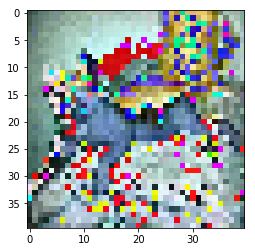

In [5]:
normalised_features_train_color=Normalise(features_train_color)

%matplotlib inline
plt.imshow(cv2.cvtColor(normalised_features_train_color[10],cv2.COLOR_BGR2RGB))

## Normalised Cat and Dog images have been prepared, now build model 

In [8]:
CNNModel=Sequential()
CNNModel.add(Conv2D(36, (4, 4), activation='relu', input_shape=(target_size, target_size, 3))) #36 convolution filters of size 4 x 4
CNNModel.add(Conv2D(36, (4, 4), activation='relu')) #
CNNModel.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None))
CNNModel.add(Dropout(0.25)) #Required to stop overtraining - randomly remove 25% of layers during the training phase.
CNNModel.add(Conv2D(64, (2, 2), activation='relu'))
CNNModel.add(Conv2D(64, (2, 2), activation='relu'))
CNNModel.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None))
CNNModel.add(Dropout(0.25))
CNNModel.add(Flatten())
CNNModel.add(Dense(512, activation='relu'))
CNNModel.add(Dropout(0.25))
CNNModel.add(Dense(1, activation='sigmoid'))
CNNsgd=SGD(lr=0.01)
CNNModel.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print classes_train_color.shape
from keras.utils import plot_model
plot_model(CNNModel, to_file='CNNModel.png')
CNNModel.fit(normalised_features_train_color,classes_train_color,batch_size=32)

(9602,)
Epoch 1/10
9602/9602 [==============================] - 104s - loss: 0.6623 - acc: 0.5900   
Epoch 2/10
9602/9602 [==============================] - 96s - loss: 0.5926 - acc: 0.6860    
Epoch 3/10
9602/9602 [==============================] - 90s - loss: 0.5403 - acc: 0.7298    
Epoch 4/10
9602/9602 [==============================] - 88s - loss: 0.5091 - acc: 0.7498    
Epoch 5/10
9602/9602 [==============================] - 93s - loss: 0.4706 - acc: 0.7720    
Epoch 6/10
9602/9602 [==============================] - 88s - loss: 0.4447 - acc: 0.7913    
Epoch 7/10
9602/9602 [==============================] - 90s - loss: 0.4214 - acc: 0.8015    
Epoch 8/10
9602/9602 [==============================] - 95s - loss: 0.4045 - acc: 0.8200    
Epoch 9/10
9602/9602 [==============================] - 94s - loss: 0.3703 - acc: 0.8360    
Epoch 10/10
9602/9602 [==============================] - 101s - loss: 0.3510 - acc: 0.8429   


In [9]:
target_size=40
features_test_color=np.zeros([len(test_set),target_size,target_size,3])
classes_test_color=np.zeros([len(test_set)])
for i in range(0,len(test_set)):
    animal = test_set[i]
   # print animal
    if 'cat' in animal:
        classes_test_color[i] = 0
        img = cv2.imread('dataset/test/cats/' + animal)
    elif 'dog' in animal:
        classes_test_color[i] = 1
        img = cv2.imread('dataset/test/dogs/' + animal)
    res_test = cv2.resize(img, (target_size, target_size))
    features_test_color[i]=np.array(res_test)

normalised_features_test_color=Normalise(features_test_color)

## Choose random image and predict whether it is a cat or a dog

(40, 40, 3)
[[ 0.80297965]]
dog


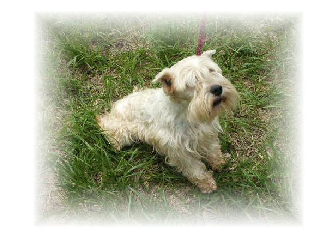

In [29]:
i = np.random.randint(len(test_set))

dic = {0:'Cat',1:'Dog'} 

animal = test_set[i]
if 'cat' in animal:
    testRGB = cv2.imread('dataset/test/cats/'+animal)
elif 'dog' in animal:
    testRGB = cv2.imread('dataset/test/dogs/'+animal)

testRGB = cv2.cvtColor(testRGB, cv2.COLOR_BGR2RGB)

image_to_predict = normalised_features_test_color[i]
print image_to_predict.shape
image_to_predict=image_to_predict[np.newaxis,:,:,:]
pred_a=CNNModel.predict(image_to_predict)
print pred_a
print "Cat" if pred_a <0.5 else "dog"
plt.imshow(testRGB);
plt.axis('off');

In [28]:
predictions=CNNModel.predict(normalised_features_test_color)
cnn_predicted_classes=[1 if x > 0.5 else 0 for x in predictions]

In [30]:
cm = metrics.confusion_matrix(classes_test_color,cnn_predicted_classes)
print cm

[[1012  189]
 [ 308  892]]


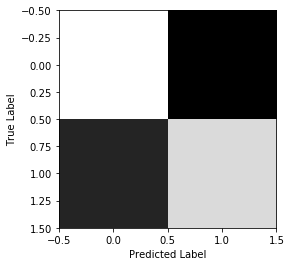

In [31]:
plt.imshow(cm,cmap='gray')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

C_{i,j}= Number known to be in group i, but actually in group j

# Which member of baps is most cat like